In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

## csvからdataを読み込む

In [2]:
data = pd.read_csv("train.csv")
data_cat = data.select_dtypes(include=[object])
data_num = data.select_dtypes(include=np.number)

## dataを整形する
- 欠陥したdataや不要なdataを削除する
- 性別を数値化する

In [3]:
data_cat.isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [4]:
data_num.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [5]:
# columnの削除
data_cat = data_cat.drop(["Cabin", "Embarked", "Name", "Ticket"], axis=1)
data_num = data_num.drop(["Age", "PassengerId"], axis=1)

In [6]:
# 性別を数値化する
le = LabelEncoder()
data_cat = data_cat.apply(le.fit_transform)
data = pd.concat([data_cat, data_num], axis=1)

##  ロジスティック回帰を用いて予測する

In [7]:
X = data.drop(["Survived"], axis=1)
Y = pd.Series(data["Survived"])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [8]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

## 様々な評価関数を用いて評価する

In [9]:
confusion_matrix(pred, y_test)

array([[101,  16],
       [ 11,  51]])

In [10]:
accuracy_score(pred, y_test)

0.8491620111731844

In [11]:
recall_score(pred, y_test)

0.8225806451612904

In [12]:
precision_score(pred, y_test)

0.7611940298507462

In [13]:
f1_score(pred, y_test)

0.7906976744186047

In [14]:
probs = lr.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, probs)

0.898454157782516

## ROC関数をplotする

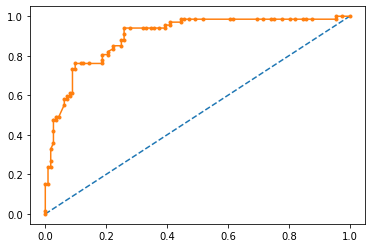

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')